In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os

#### Loading the data directly from where it is output means we always have the latest run 
not always best but, e.g. if mistakes are made but it works here. 

In [5]:
# getting dirctory
parentDirectory = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# moving one up
path_contour= os.path.join(parentDirectory, \
                           'Slope steepness from contours', 'Final Data Output', "206 stations with slope Data.csv")
path_DEM = os.path.join(parentDirectory, 'Slope steepness from DEM','Slopes computed from DEM', 'Slopes computed from DEM.csv')

contour = pd.read_csv(path_contour,index_col=0)
DEM = pd.read_csv(path_DEM,index_col=0)

In [6]:
DEM_sparse = DEM.drop(columns=['level_0', 'station_na', 'station_fi',
       'historic_c', 'station_la', 'station_lo', 'station_el', 'first_year',
       'last_year', 'raster_id', 'geometry'])
DEM_sparse.head(1)

,src_id,computed_height,difference_height,slope_steepness,abs_slope_steepness,dir_slope_steepness
0,3,57,0,14.2,14.2,nw-se


In [7]:
contour.head(1)

,src_id,station_na,station_fi,historic_c,station_la,station_lo,station_el,first_year,last_year,geometry,grid_id,grid_id_distance,Slope_resorted,Slope_sorted
0,3,FAIR ISLE,fair-isle,shetland,59.526,-1.63,57,1974,2020,POINT (-1.63 59.526),27,789.29992,27.24,43.44


In [8]:
combined = contour.merge(DEM_sparse,on="src_id")
combined.head(1)

,src_id,station_na,station_fi,historic_c,station_la,station_lo,station_el,first_year,last_year,geometry,grid_id,grid_id_distance,Slope_resorted,Slope_sorted,computed_height,difference_height,slope_steepness,abs_slope_steepness,dir_slope_steepness
0,3,FAIR ISLE,fair-isle,shetland,59.526,-1.63,57,1974,2020,POINT (-1.63 59.526),27,789.29992,27.24,43.44,57,0,14.2,14.2,nw-se


In [9]:
combined["difference_DEM_Contour"] = combined.Slope_resorted - combined.abs_slope_steepness
combined["abs_difference_DEM_Contour"] = abs(combined.Slope_resorted - combined.abs_slope_steepness)
combined.head(1)

,src_id,station_na,station_fi,historic_c,station_la,station_lo,station_el,first_year,last_year,geometry,...,grid_id_distance,Slope_resorted,Slope_sorted,computed_height,difference_height,slope_steepness,abs_slope_steepness,dir_slope_steepness,difference_DEM_Contour,abs_difference_DEM_Contour
0,3,FAIR ISLE,fair-isle,shetland,59.526,-1.63,57,1974,2020,POINT (-1.63 59.526),...,789.29992,27.24,43.44,57,0,14.2,14.2,nw-se,13.04,13.04


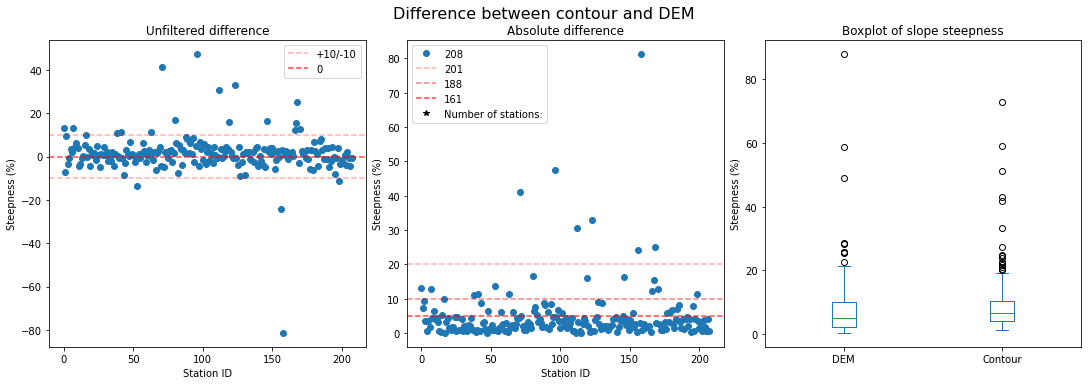

In [51]:
less_than_all = combined.src_id.count()
less_than_20 = combined.query("abs_difference_DEM_Contour < 20").src_id.count()
less_than_10 = combined.query("abs_difference_DEM_Contour < 10").src_id.count()
less_than_5 = combined.query("abs_difference_DEM_Contour < 5").src_id.count()


# fig = plt.figure(constrained_layout=True, figsize=(15,5))

# ax[0] = fig.add_subplot(1, 3, 1)
# ax[1] = fig.add_subplot(1, 3, 2, sharey = ax[2])
# ax[2] = fig.add_subplot(1, 3, 3, sharey = ax[1])

fig, ax = plt.subplots(1,3, constrained_layout=True, figsize=(15,5))
title = 'Difference between contour and DEM'
fig.suptitle(title,y=1.04,fontsize=16)

combined.difference_DEM_Contour.plot(style="o",ax=ax[0],label='_nolegend_')
ax[0].set_title("Unfiltered difference")
ax[0].axhline(10,color="red", linestyle="dashed",alpha=0.3,label=f"+10/-10")
ax[0].axhline(-10,color="red", linestyle="dashed",alpha=0.3)
ax[0].axhline(0,color="red", linestyle="dashed",alpha=0.7,label=f"0")
ax[0].set_ylabel("Steepness (%)")
ax[0].set_xlabel("Station ID")
ax[0].legend()

combined.abs_difference_DEM_Contour.plot(style="o",ax=ax[1],label=f"{less_than_all}")
ax[1].set_title("Absolute difference")
ax[1].axhline(20,color="red", linestyle="dashed",alpha=0.3,label=f"{less_than_20}")
ax[1].axhline(10,color="red", linestyle="dashed",alpha=0.5,label=f"{less_than_10}")
ax[1].axhline(5,color="red", linestyle="dashed",alpha=0.7,label=f"{less_than_5}")
ax[1].set_ylabel("Steepness (%)")
ax[1].set_xlabel("Station ID")
ax[1].plot([], [], 'k*', label="Number of stations:") # trick to add label to the legens
ax[1].legend()

pd.DataFrame(combined, \
             columns=["abs_slope_steepness","Slope_resorted"])\
            .astype(float).plot.box(ax=ax[2])


ax[2].set_title("Boxplot of slope steepness")
ax[2].set_xticks(ax[2].get_xticks(),["DEM","Contour"])
ax[2].set_ylabel("Steepness (%)")
# ax[2].get_yaxis().set_visible(False)


ax[1].figure.savefig(f'{title}.jpg',bbox_inches='tight')


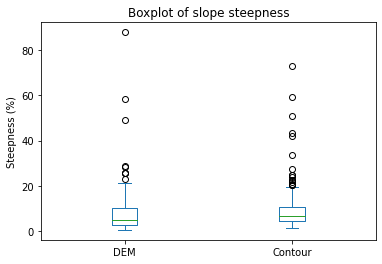

In [11]:
pd.DataFrame(combined, columns=["abs_slope_steepness","Slope_resorted"]).astype(float).plot.box(labels=["DEM","Contour"])
plt.title("Boxplot of slope steepness")
plt.xticks(plt.xticks()[0],["DEM","Contour"])
plt.ylabel("Steepness (%)")
plt.savefig("Slopesteepness Boxplot DEM vs resorted.jpg")